# NRAM Implementation

### --------------------Dataset 4 Implemenation--------------------

### Status
Completed
*   Base Framework
*   Code Cleanup
*   Neural Network model - MLP, LSTM, LSTM + MLP
*  Dataset 1
*  Not Gate
* Update model to run more gates
* Add read/write module
* Dataset 2 for read/write module 
* Dataset 3 for copy
* Dataset 4 for basic bucket sort
* Dataset 5 larger bucket sort list
* Dataset 6 larger bucket sort list

To-Do - Priority -2
* LSTM - check hidden states
* Check Final Error Summation


To-Do - Priority -3
* Gradient Clipping
* Gradient Noise
* Entropy
* Limit the value of log
* Enforcing Distribution Constraint


#### Errors
* Training
* Testing - same size problem
* Testing - different sized problem


#### 5 Different parameters
* Layer size
* Learning rate


#### Plot
Y-axis error
X-axis training iteration

### Ablation Study
After training, perturb the model (added noise, removed layers, etc.) or the data (added noise, shuffled input, etc). Show the impacts of the ablation on the three types of errors, for the 5 different hyper-parameter settings. Randomize the ablations and show aggregated error results (e.g., with histograms or boxplots)


## Initial Setup

### Import libraries

In [0]:
from __future__ import print_function

import numpy as np
import tensorflow as tf

from tensorflow.keras import layers

import matplotlib.pyplot as plt

tf.enable_eager_execution()

### Create Modules / Gates

In [0]:
def zeroModule(a, M):
    zero = np.asarray([0])
    return tf.one_hot(zero, M)

In [0]:
def oneModule(a, M):
    one = np.asarray([1])
    return tf.one_hot(one, M)

In [0]:
def twoModule(a, M):
    two = np.asarray([2])
    return tf.one_hot(two, M)

In [0]:
def incModule(a, M):
  return tf.roll(a, shift=1, axis=1)

In [0]:
def decModule(a, M):
  return tf.roll(a, shift=-1, axis=1)

In [0]:
# def incModule1(a, M):
#   aVal = tf.argmax(a, axis=1)
#   addVal = tf.mod(tf.add(aVal, 1), a.shape[1])
#   return tf.one_hot(addVal, a.shape[1])

In [0]:
def addModule(a, b, M):
  aVal = tf.argmax(a, axis=1)
  bVal = tf.argmax(b, axis=1)
  addVal = tf.mod(tf.add(aVal, bVal), a.shape[1])
  return tf.one_hot(addVal, a.shape[1])

In [0]:
# def addModule2(a, b, M):
#     bVal = tf.roll(b, shift=-M, axis=1)
    
#     rows = [tf.roll(b, shift=shift+1, axis=1) for shift in range(M)]
#     print(rows)
#     bVal = tf.stack(rows)
#     print(bVal)
#     bVal = tf.reshape(bVal, shape=[4,4,1])
#     print(bVal)
# #     return bVal
#     return tf.tensordot(a, bVal, axes=1)

In [0]:
# addModule2(tf.one_hot([2], M), tf.one_hot([1], M), M)

In [0]:
def subModule(a, b, M):
  aVal = tf.argmax(a, axis=1)
  bVal = tf.argmax(b, axis=1)
  subtractVal = tf.mod(tf.subtract(aVal, bVal), M)
  return tf.one_hot(subtractVal, M)

In [0]:
def lessModule(a, b, M):
  aVal = tf.argmax(a, axis=1)
  bVal = tf.argmax(b, axis=1)
  lessVal = tf.less(aVal, bVal)
  return tf.one_hot(tf.cast(lessVal, tf.int64), M)

In [0]:
def lessOrEqualThenModule(a, b, M):
  aVal = tf.argmax(a, axis=1)
  bVal = tf.argmax(b, axis=1)
  lessVal = tf.less_equal(aVal, bVal)
  return tf.one_hot(tf.cast(lessVal, tf.int64), M)

In [0]:
def equalModule(a, b, M):
  aVal = tf.argmax(a, axis=1)
  bVal = tf.argmax(b, axis=1)
  equalVal = tf.equal(aVal, bVal)
  return tf.one_hot(tf.cast(equalVal, tf.int64), M)

In [0]:
def minimumModule(a, b, M):
  aVal = tf.argmax(a, axis=1)
  bVal = tf.argmax(b, axis=1)
  minimumVal = tf.minimum(aVal, bVal)
  return tf.one_hot(tf.cast(minimumVal, tf.int64), M)

In [0]:
def maximumModule(a, b, M):
  aVal = tf.argmax(a, axis=1)
  bVal = tf.argmax(b, axis=1)
  maximumVal = tf.maximum(aVal, bVal)
  return tf.one_hot(tf.cast(maximumVal, tf.int64), M)

### Test Modules

In [0]:
#Note : Temporary M Values
M = 20

In [0]:
# incModule1(tf.one_hot([1, 2], M), M)

In [19]:
incModule(tf.one_hot([1, 2], M), M)

<tf.Tensor: id=7, shape=(2, 20), dtype=float32, numpy=
array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [20]:
decModule(tf.one_hot([4, 9], M), M)

<tf.Tensor: id=16, shape=(2, 20), dtype=float32, numpy=
array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [21]:
addModule(tf.one_hot([1, 2], M), tf.one_hot([1, 2], M), M)

<tf.Tensor: id=38, shape=(2, 20), dtype=float32, numpy=
array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [0]:
# addModule2(tf.one_hot([2], M), tf.one_hot([1], M), M)

In [23]:
addModule(np.array([[0., 0., 0., 0.5, 0.5]]), np.array([[0., 0., 0., 1., 0.]]), M)

<tf.Tensor: id=52, shape=(1, 5), dtype=float32, numpy=array([[0., 1., 0., 0., 0.]], dtype=float32)>

**Note: One hot of values greater than M is 0**

In [24]:
tf.one_hot([7, 8], M)

<tf.Tensor: id=58, shape=(2, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [25]:
subModule(tf.one_hot([4, 8], M), tf.one_hot([6, 7], M), M)

<tf.Tensor: id=80, shape=(2, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [26]:
incModule(tf.one_hot([4, 9], M), M)

<tf.Tensor: id=89, shape=(2, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [27]:
decModule(tf.one_hot([4, 9], M), M)

<tf.Tensor: id=98, shape=(2, 20), dtype=float32, numpy=
array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [28]:
lessModule(tf.one_hot([8, 5], M), tf.one_hot([6, 7], M), M)

<tf.Tensor: id=119, shape=(2, 20), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [29]:
lessOrEqualThenModule(tf.one_hot([8, 5], M), tf.one_hot([8, 7], M), M)

<tf.Tensor: id=140, shape=(2, 20), dtype=float32, numpy=
array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [30]:
equalModule(tf.one_hot([8, 5], M), tf.one_hot([8, 7], M), M)

<tf.Tensor: id=161, shape=(2, 20), dtype=float32, numpy=
array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [31]:
minimumModule(tf.one_hot([8, 5], M), tf.one_hot([8, 7], M), M)

<tf.Tensor: id=181, shape=(2, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

### Circuit Implementation

In [0]:
# def dotProduct(a, b):
#   print("a ",a.shape)
#   print("b ", b.shape)
#   if len(a.shape) == 2:
#     return tf.tensordot(a.T, b, axes=1)
#   else:
#     output = []
#     for i in range(a.shape[0]):
#       aT = tf.transpose(a[i])
#       output.append(tf.tensordot(aT, b[i], axes=1))
#     return tf.stack(output)

In [0]:
def dotProduct(a, b):
  if len(b.shape) > 1:
    print("error dotProduct shape: ", b.shape)
  aT = tf.transpose(a)
  aT = tf.reshape(aT, [a.shape[0],a.shape[2],a.shape[1]])
  return tf.tensordot(aT, b, axes=1)

In [34]:
a = np.array([[
    [1., 2., 3.],
    [4., 5., 6.],
]])

b = np.array([1., 0.])
dotProduct(a, b)


a = np.array([[
    [1., 2., 3.],
    [4., 5., 6.],
]])

b = np.array([0., 1.])
dotProduct(a, b)

<tf.Tensor: id=216, shape=(1, 3), dtype=float64, numpy=array([[4., 5., 6.]])>

In [0]:
# a = np.array([
#     [
#       [1., 2., 3.],
#       [4., 5., 6.],
#     ],
#     [
#       [1., 2., 3.],
#       [4., 5., 6.],
#     ],
# ])

# b = np.array([
#       [1., 0.],
#       [0., 1.]
#     ])
# dotProduct(a, b)

#### Gates List

In [0]:
gates = [incModule, decModule, addModule]

In [37]:
gates[0](tf.one_hot([1, 9], M), M)

<tf.Tensor: id=225, shape=(2, 20), dtype=float32, numpy=
array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

#### Gate Controller Output

Runs the input which is selected by controller values into the gate passed and returns the output from the gate

In [0]:
def gateOutput(gate, inputs, controllerValues, M):
  if(controllerValues.shape[0] > 1):
    gateInputA = dotProduct(inputs, controllerValues[0])
    gateInputB = dotProduct(inputs, controllerValues[1])
    output = gate(gateInputA, gateInputB, M)
  else:
    gateInputA = dotProduct(inputs, controllerValues[0])
    output = gate(gateInputA, M)
  
  return output

In [0]:
ip = np.array([[
  [1., 0., 0., 0., 0.],
  [0., 1., 0., 0., 0.],
  [0., 0., 0., 1., 0.],
  [0., 1., 0., 0., 0.]
 ]])

In [40]:
cp = np.array([[0., 0., 0., 1.],
              [0., 0., 1., 0.]])
cp.shape

(2, 4)

Run gate to check output - Adds ip 4th value with 3rd value

In [0]:
outputVal = gateOutput(gates[2], ip, cp, M)

In [42]:
outputVal

<tf.Tensor: id=271, shape=(1, 5), dtype=float32, numpy=array([[0., 0., 0., 0., 1.]], dtype=float32)>

In [43]:
tf.dtypes.cast(ip, tf.float32)

<tf.Tensor: id=274, shape=(1, 4, 5), dtype=float32, numpy=
array([[[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.]]], dtype=float32)>

For adding the output to the registers

In [44]:
tf.concat([ip, [outputVal]], axis=1)

<tf.Tensor: id=280, shape=(1, 5, 5), dtype=float64, numpy=
array([[[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.]]])>

In [45]:
zeroModule([], M)

<tf.Tensor: id=286, shape=(1, 20), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

#### Input Register

In [0]:
def registerValueModule(a):
    aVal = np.asarray([a])
    return tf.one_hot(aVal, M)

In [47]:
registerValueModule(2)

<tf.Tensor: id=292, shape=(1, 20), dtype=float32, numpy=
array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [0]:
registers = tf.concat([registerValueModule(0), registerValueModule(1), registerValueModule(3)], axis=0)

**Registers = [0,1,3]**

In [0]:
registers = tf.reshape(registers, shape=[1, registers.shape[0], registers.shape[1]])

In [50]:
registers

<tf.Tensor: id=312, shape=(1, 3, 20), dtype=float32, numpy=
array([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]]], dtype=float32)>

#### Update data

In [0]:
def runTimeStep(gates, registers, controllerValues_, registercontrollerValues_):
  updatedRegisters = registers
  for i in range(len(gates)):
    output = gateOutput(gates[i], updatedRegisters, controllerValues_[i], M)
    updatedRegisters = tf.concat([updatedRegisters, [output]], axis=1)

  output_registers = []

  for i in range(registers.shape[1]):
    output = dotProduct(updatedRegisters, registercontrollerValues_[i])
    output_registers.append(output)
  
  output_registers = tf.stack(output_registers, axis=1)
  
  return output_registers

**Circuit Testing 1**

In [52]:
# registers = [2, 1, 3]
registers = tf.concat([registerValueModule(2), registerValueModule(1), registerValueModule(3)], axis=0)
registers = tf.reshape(registers, shape=[1, registers.shape[0], registers.shape[1]])

print("Input registers: ", tf.argmax(registers, axis=2))

# Gatest -> Increment, Decrement, Addition
gates = [incModule, decModule, addModule]

# Increment input r1 -> decrement output o1 -> add output o2 + input r1
controllerValues_ = [
    [[0, 1, 0]],
    [[0, 0, 0, 1]],
    [[0, 0, 0, 0, 1],
     [0, 1, 0, 0, 0]]
]

# Save the input r2 -> output r0, input r0 -> output r1, last gate output -> output r2
registerControllerValues_ = [
    [0, 0, 1, 0, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1]
]

controllerValues = []
for value in controllerValues_:
  controllerValues.append(tf.dtypes.cast(value, tf.float32))

registerControllerValues = []
for value in registerControllerValues_:
  registerControllerValues.append(tf.dtypes.cast(value, tf.float32))

# Calling the function to run the complete circuit
output_registers = runTimeStep(gates, registers, controllerValues, registerControllerValues)

print("\noutput_registers:\n", output_registers)
print("\noutput_registers:\n", tf.argmax(output_registers, axis=2))

Input registers:  tf.Tensor([[2 1 3]], shape=(1, 3), dtype=int64)

output_registers:
 tf.Tensor(
[[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]], shape=(1, 3, 20), dtype=float32)

output_registers:
 tf.Tensor([[3 2 2]], shape=(1, 3), dtype=int64)


**Circuit Testing 2**

In [53]:
gates = [addModule]

controllerValues_ = [
    [
        [1, 0, 0],
        [0, 1, 0]
    ]
]

registerControllerValues_ = [
    [0, 0, 0, 1],
    [0, 1, 0, 0],
    [0, 0, 1, 0]
]


controllerValues = []
for value in controllerValues_:
  controllerValues.append(tf.dtypes.cast(value, tf.float32))

registerControllerValues = []
for value in registerControllerValues_:
  registerControllerValues.append(tf.dtypes.cast(value, tf.float32))

# First set of input values
registers = tf.concat([registerValueModule(1), registerValueModule(1), registerValueModule(3)], axis=0)
registers = tf.reshape(registers, shape=[1, registers.shape[0], registers.shape[1]])

print("Input register set 1: ", tf.argmax(registers, axis=2))

print("\nRunning input r0 , r1 -> add -> output r0")

# Calling the function to run the complete circuit
output_registers = runTimeStep(gates, registers, controllerValues, registerControllerValues)

print("\noutput_registers:\n", output_registers)
print("\noutput_registers:\n", tf.argmax(output_registers, axis=2))


# Second set of input values
registers = tf.concat([registerValueModule(2), registerValueModule(1), registerValueModule(3)], axis=0)
registers = tf.reshape(registers, shape=[1, registers.shape[0], registers.shape[1]])

print("\n\nInput register set 2: ", tf.argmax(registers, axis=2))

print("\nRunning input r0 , r1 -> add -> output r0")
# Calling the function to run the complete circuit
output_registers = runTimeStep(gates, registers, controllerValues, registerControllerValues)

print("\noutput_registers:\n", output_registers)
print("\noutput_registers:\n", tf.argmax(output_registers, axis=2))

Input register set 1:  tf.Tensor([[1 1 3]], shape=(1, 3), dtype=int64)

Running input r0 , r1 -> add -> output r0

output_registers:
 tf.Tensor(
[[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]], shape=(1, 3, 20), dtype=float32)

output_registers:
 tf.Tensor([[2 1 3]], shape=(1, 3), dtype=int64)


Input register set 2:  tf.Tensor([[2 1 3]], shape=(1, 3), dtype=int64)

Running input r0 , r1 -> add -> output r0

output_registers:
 tf.Tensor(
[[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]], shape=(1, 3, 20), dtype=float32)

output_registers:
 tf.Tensor([[3 1 3]], shape=(1, 3), dtype=int64)


### Memory

In [0]:
def readMemory(pointer, memory, M):
  # pointer -> 1,M
  # memory -> M, M
  # output -> 1, M
  val = tf.tensordot(pointer, memory, axes=1)
  return val

def registerModule(a, M):
    aVal = np.asarray([a])
    return tf.one_hot(aVal, M)

In [55]:
registers = []
for _ in range(10):
  registers.append(registerModule(_+2, 10))
registers = tf.concat(registers, axis=0)
print(registers)

pointer = np.array([[0., 0., 0., 0., 0., 0.5, 0.5, 0., 0., 0.]], dtype="float32")

print(pointer)

val = readMemory(pointer, registers, 10)

print(val)

tf.Tensor(
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(10, 10), dtype=float32)
[[0.  0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]]
tf.Tensor([[0.  0.  0.  0.  0.  0.  0.  0.5 0.5 0. ]], shape=(1, 10), dtype=float32)


In [0]:
def writeMemory(pointer, value, memory, M):
  # newValToWrite -> M, M
  # mask -> M, M
  # M:=(J−p)JT ·M+paT
  
  newValToWrite = tf.tensordot(tf.transpose(pointer), value, axes=1)

  J = np.ones([1,M], dtype="float32")
  erase = tf.transpose(J-pointer)
  
  mask = tf.tensordot(erase, J, axes=1)
  
  oldMemory = mask * memory

  return oldMemory + newValToWrite

In [57]:
registers = []
for _ in range(10):
  registers.append(registerModule(_, 10))
memory = tf.concat(registers, axis=0)
memory = np.array(memory, dtype="float32")
print(memory)

pointer = np.array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype="float32")
value    = np.array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype="float32")

outMemory = writeMemory(pointer, value, memory, 10)
print(outMemory)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
tf.Tensor(
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(10, 10), dtype=float32)


## NRAM Controller Model

#### NRAM Controller MLP Model

In [0]:
def gateOutputNN(gate, registers, controllerValues, M):
  if(len(controllerValues) > 1):
    gateInputA = dotProduct(registers, controllerValues[0][0])
    gateInputB = dotProduct(registers, controllerValues[1][0])
    output = gate(gateInputA, gateInputB, M)
  else:
    gateInputA = dotProduct(registers, controllerValues[0][0])
    output = gate(gateInputA, M)
  return output

In [0]:
# Handle extra b size
def dotProductMemory(a, b):
  aT = tf.transpose(a)
  aT = tf.reshape(aT, [a.shape[0],a.shape[2],a.shape[1]])
  return tf.tensordot(aT, b[0], axes=1)

In [0]:
def runTimeStepNN(gates, registers, memory, readModule, writeModule, controllerValues_, registercontrollerValues_):
  updatedRegisters = registers

  M = memory.shape[0]
  pointer = dotProductMemory(updatedRegisters, controllerValues_[0][0])
  value = readModule(pointer, memory, M)

  value= tf.reshape(value, shape=[value.shape[0], 1, value.shape[1]])
  updatedRegisters = tf.concat([updatedRegisters, value], axis=1)
  
  for i in range(len(gates)):
    output = gateOutputNN(gates[i], updatedRegisters, controllerValues_[i+1], M)
    output= tf.reshape(output, shape=[updatedRegisters.shape[0], 1, updatedRegisters.shape[2]])
    updatedRegisters = tf.concat([updatedRegisters, output], axis=1)
  
  # controllerValues_[-1] => [Pointer, Value]
  writePointer = dotProductMemory(updatedRegisters, controllerValues_[-1][0])
  writeValue = dotProductMemory(updatedRegisters, controllerValues_[-1][1])
  
  outputMemory = writeMemory(writePointer, writeValue, memory, M)
  writePointer = tf.reshape(writePointer, shape=[writePointer.shape[0], 1, writePointer.shape[1]])
  updatedRegisters = tf.concat([updatedRegisters, writePointer], axis=1)

  outputRegisters = []
  for i in range(registers.shape[1]):
    output = dotProduct(updatedRegisters, registercontrollerValues_[i][0])
    outputRegisters.append(output)
  
  outputRegisters = tf.stack(outputRegisters, axis=1)
  
  return outputRegisters, outputMemory

In [0]:
class NRAMController(tf.keras.Model):
   def __init__(self, hidden_dimensions=100, gateControllerDimensions=[[3], [4,4]], registerControllerDimensions=[4, 4, 4]):
      super(NRAMController, self).__init__()
      self.Hidden1 = tf.keras.layers.Dense(hidden_dimensions, input_shape=(3,), use_bias=True, activation="relu")
      self.Hidden2 = tf.keras.layers.Dense(hidden_dimensions, input_shape=(hidden_dimensions,), use_bias=True, activation="relu")

      self.gateControllerDimensions = gateControllerDimensions
      self.registerControllerDimensions = registerControllerDimensions

      # Gate Inputs Controller values 
      self.GateControllerOutput = []
      for gateControllerValue in gateControllerDimensions:
        GateController = []
        for dim in gateControllerValue:
          GateController.append(tf.keras.layers.Dense(dim, input_shape=(hidden_dimensions,), use_bias=True, activation="softmax"))
        self.GateControllerOutput.append(GateController)

      # Register Output Controller Values
      self.RegisterController = []
      for i in registerControllerDimensions:
        self.RegisterController.append(tf.keras.layers.Dense(i, input_shape=(hidden_dimensions,), use_bias=True, activation="softmax"))

      # Complete status
      self.CompletedStatus = tf.keras.layers.Dense(1, input_shape=(hidden_dimensions,), use_bias=True, activation="sigmoid")
   
   def call(self, input_registers):
      # hidden layers
      hidden1 = self.Hidden1(input_registers)
      hidden2 = self.Hidden2(hidden1)
      
      # To get gate controller values
      gateControllerOutput = []
      for i in range(len(self.gateControllerDimensions)):
        gateController = []
        for j in range(len(self.gateControllerDimensions[i])):
          gateController.append(self.GateControllerOutput[i][j](hidden2))
        gateControllerOutput.append(gateController)
         
      registerControllerOutput = []
      # To get register controller values
      for i in range(len(self.registerControllerDimensions)):
        registerControllerOutput.append(self.RegisterController[i](hidden2))

      # final completed status
      completed = self.CompletedStatus(hidden2)

      return gateControllerOutput, registerControllerOutput, completed

#### Example Implementation

In [0]:
# Creating instance of the contoller network
nramController = NRAMController(hidden_dimensions=100, gateControllerDimensions=[[3], [4], [5], [6,6], [7, 7]], registerControllerDimensions=[8, 8, 8]);

In [63]:
# Running the controller
gateControllerOutput, registerControllerOutput, completedStatus = nramController(tf.Variable(tf.ones((1,3))))

print("\nThe output from the neural network controller without training \n")
gateControllerOutput

Instructions for updating:
Colocations handled automatically by placer.

The output from the neural network controller without training 



[[<tf.Tensor: id=1000, shape=(1, 3), dtype=float32, numpy=array([[0.37230447, 0.28697336, 0.34072214]], dtype=float32)>],
 [<tf.Tensor: id=1027, shape=(1, 4), dtype=float32, numpy=array([[0.30113864, 0.2007511 , 0.2653489 , 0.23276134]], dtype=float32)>],
 [<tf.Tensor: id=1054, shape=(1, 5), dtype=float32, numpy=
  array([[0.17710035, 0.19932449, 0.22247809, 0.17420568, 0.2268914 ]],
        dtype=float32)>],
 [<tf.Tensor: id=1081, shape=(1, 6), dtype=float32, numpy=
  array([[0.20189562, 0.15323657, 0.18456745, 0.14026861, 0.16120267,
          0.15882906]], dtype=float32)>,
  <tf.Tensor: id=1108, shape=(1, 6), dtype=float32, numpy=
  array([[0.20499408, 0.17442021, 0.14447783, 0.1348918 , 0.17228264,
          0.16893345]], dtype=float32)>],
 [<tf.Tensor: id=1135, shape=(1, 7), dtype=float32, numpy=
  array([[0.11742136, 0.11574272, 0.14552216, 0.16923682, 0.19149885,
          0.14980012, 0.11077798]], dtype=float32)>,
  <tf.Tensor: id=1162, shape=(1, 7), dtype=float32, numpy=
  arr

In [64]:
registerControllerOutput

[<tf.Tensor: id=1189, shape=(1, 8), dtype=float32, numpy=
 array([[0.14613116, 0.14055979, 0.14297901, 0.11615644, 0.14677796,
         0.10847977, 0.0845544 , 0.11436144]], dtype=float32)>,
 <tf.Tensor: id=1216, shape=(1, 8), dtype=float32, numpy=
 array([[0.13265939, 0.11767452, 0.1222621 , 0.13187745, 0.13280205,
         0.09305298, 0.16974987, 0.09992165]], dtype=float32)>,
 <tf.Tensor: id=1243, shape=(1, 8), dtype=float32, numpy=
 array([[0.1408189 , 0.09443189, 0.11637634, 0.15165898, 0.10242932,
         0.11085888, 0.11570625, 0.16771947]], dtype=float32)>]

In [65]:
completedStatus

<tf.Tensor: id=1270, shape=(1, 1), dtype=float32, numpy=array([[0.43601167]], dtype=float32)>

##### Input Controller Values is the output of NN being applied to the circuit for one time step

In [66]:
r_ = []
for _ in range(M):
  r_.append(registerModule(_, M))
memory = tf.concat(r_, axis=0)
memory = np.array(memory, dtype="float32")
print(memory)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.

In [67]:
gates = [incModule, decModule, addModule]

# First set of input values
registers = tf.concat([registerValueModule(0), registerValueModule(0), registerValueModule(0)], axis=0)
registers = tf.reshape(registers, shape=[1, registers.shape[0], registers.shape[1]])

print("Input register set 1: ", tf.argmax(registers, axis=2))

print("\nRunning input r0 -> increment -> output r0")

# Calling the function to run the complete circuit
output_registers, memory = runTimeStepNN(gates, registers, memory, readMemory, writeMemory, gateControllerOutput, registerControllerOutput)

print("\nOutput Memory")
print(memory)

print("\noutput_registers:\n", output_registers)
print("\noutput_registers:\n", tf.argmax(output_registers, axis=2))

Input register set 1:  tf.Tensor([[0 0 0]], shape=(1, 3), dtype=int64)

Running input r0 -> increment -> output r0

Output Memory
tf.Tensor(
[[0.83925533 0.08968843 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.07105629]
 [0.14705984 0.8332962  0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.01964401]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.  

In [68]:
memory

<tf.Tensor: id=1616, shape=(20, 20), dtype=float32, numpy=
array([[0.83925533, 0.08968843, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.07105629],
       [0.14705984, 0.8332962 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01964401],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        

#### NRAM Controller with LSTM V1

In [0]:
class NRAMControllerLSTM(tf.keras.Model):
  def __init__(self, hidden_dimensions=256, gateControllerDimensions=[[3], [4,4]], registerControllerDimensions=[4, 4, 4]):
    super(NRAMControllerLSTM, self).__init__()
    self.lstm = layers.LSTM(hidden_dimensions, return_sequences=True, return_state=True)

    self.gateControllerDimensions = gateControllerDimensions
    self.registerControllerDimensions = registerControllerDimensions

    # Gate Inputs Controller values 
    self.GateControllerOutput = []
    for gateControllerValue in gateControllerDimensions:
      GateController = []
      for dim in gateControllerValue:
        GateController.append(tf.keras.layers.Dense(dim, input_shape=(hidden_dimensions,), use_bias=True, activation="softmax"))
      self.GateControllerOutput.append(GateController)

    # Register Output Controller Values
    self.RegisterController = []
    for i in registerControllerDimensions:
      self.RegisterController.append(tf.keras.layers.Dense(i, input_shape=(hidden_dimensions,), use_bias=True, activation="softmax"))

    self.CompletedStatus = tf.keras.layers.Dense(1, input_shape=(hidden_dimensions,), use_bias=True, activation="sigmoid")

  def call(self, input_registers):
    inputValue = tf.reshape(input_registers, shape=[input_registers.shape[0], 1, input_registers.shape[1]])
    lstm_output, state_h, state_c  = self.lstm(inputValue)

    # To get gate controller values
    gateControllerOutput = []
    for i in range(len(self.gateControllerDimensions)):
      gateController = []
      for j in range(len(self.gateControllerDimensions[i])):
        o = self.GateControllerOutput[i][j](lstm_output)
        gateController.append(tf.reshape(o, shape=[o.shape[0],o.shape[2]]))
      gateControllerOutput.append(gateController)

    registerControllerOutput = []
    # To get register controller values
    for i in range(len(self.registerControllerDimensions)):
      o = self.RegisterController[i](lstm_output)
      registerControllerOutput.append(tf.reshape(o, shape=[o.shape[0],o.shape[2]]))

    # final completed status
    completed = self.CompletedStatus(lstm_output)

    return gateControllerOutput, registerControllerOutput, completed

In [70]:
# Creating instance of the contoller network
nramControllerLSTM = NRAMControllerLSTM();

# Running the controller
gateControllerOutput, registerControllerOutput, completedStatus = nramControllerLSTM(tf.Variable(tf.ones((1,3))))

print("\nThe output from the neural network controller without training \n")
gateControllerOutput


The output from the neural network controller without training 



[[<tf.Tensor: id=2069, shape=(1, 3), dtype=float32, numpy=array([[0.32622147, 0.34377876, 0.32999974]], dtype=float32)>],
 [<tf.Tensor: id=2114, shape=(1, 4), dtype=float32, numpy=array([[0.25935197, 0.25328338, 0.23664114, 0.25072348]], dtype=float32)>,
  <tf.Tensor: id=2159, shape=(1, 4), dtype=float32, numpy=array([[0.25244626, 0.25777104, 0.24896346, 0.24081925]], dtype=float32)>]]

In [71]:
registerControllerOutput

[<tf.Tensor: id=2204, shape=(1, 4), dtype=float32, numpy=array([[0.24601799, 0.25457376, 0.25704366, 0.24236459]], dtype=float32)>,
 <tf.Tensor: id=2249, shape=(1, 4), dtype=float32, numpy=array([[0.24842866, 0.25543913, 0.24552289, 0.25060934]], dtype=float32)>,
 <tf.Tensor: id=2294, shape=(1, 4), dtype=float32, numpy=array([[0.25713637, 0.23989758, 0.25396597, 0.2490001 ]], dtype=float32)>]

#### NRAM Controller with LSTM V2

In [0]:
class NRAMControllerLSTM2(tf.keras.Model):
   def __init__(self, hidden_dimensions=256, gateControllerDimensions=[[3], [4,4]], registerControllerDimensions=[4, 4, 4]):
      super(NRAMControllerLSTM2, self).__init__()
#       self.lstmHidden = layers.CuDNNLSTM(hidden_dimensions, return_sequences=True, return_state=True)
      self.lstmHidden = layers.LSTM(hidden_dimensions, return_sequences=True, return_state=True)

#       self.output_dimensions = output_dimensions

#       self.Output = []
#       self.SoftmaxOutput = []
#       # Gate Inputs Controller values and Register Output Controller Values
#       for dimension in output_dimensions:
#         self.Output.append(layers.LSTM(dimension, return_sequences=True, return_state=True))
#         self.SoftmaxOutput.append(layers.Activation("softmax"))

      self.gateControllerDimensions = gateControllerDimensions
      self.registerControllerDimensions = registerControllerDimensions

      # Gate Inputs Controller values 
      self.GateControllerOutput = []
      self.SoftmaxGateOutput= []
      for gateControllerValue in gateControllerDimensions:
        GateController = []
        SoftmaxLayer = []
        for dim in gateControllerValue:
          GateController.append(layers.LSTM(dim, return_sequences=True, return_state=True))
          SoftmaxLayer.append(layers.Activation("softmax"))
        self.GateControllerOutput.append(GateController)
        self.SoftmaxGateOutput.append(SoftmaxLayer)

      # Register Output Controller Values
      self.RegisterController = []
      self.SoftmaxRegisterOutput = []
      for i in registerControllerDimensions:
        self.RegisterController.append(layers.LSTM(i, return_sequences=True, return_state=True))
        self.SoftmaxRegisterOutput.append(layers.Activation("softmax"))

      self.CompletedStatus = tf.keras.layers.Dense(1, input_shape=(hidden_dimensions,), use_bias=True, activation="sigmoid")
   
   def call(self, input_registers):
      inputValue = tf.reshape(input_registers, shape=[input_registers.shape[0], 1, input_registers.shape[1]])
      lstm_output, state_h, state_c  = self.lstmHidden(inputValue)

      # To get gate controller values
      gateControllerOutput = []
      for i in range(len(self.gateControllerDimensions)):
        gateController = []
        for j in range(len(self.gateControllerDimensions[i])):
          o, h, c = self.GateControllerOutput[i][j](lstm_output)
          gateController.append(self.SoftmaxGateOutput[i][j](tf.reshape(o, shape=[o.shape[0],o.shape[2]])))
        gateControllerOutput.append(gateController)

      registerControllerOutput = []
      # To get register controller values
      for i in range(len(self.registerControllerDimensions)):
        o, h, c = self.RegisterController[i](lstm_output)
        registerControllerOutput.append(self.SoftmaxRegisterOutput[i](tf.reshape(o, shape=[o.shape[0],o.shape[2]])))

#       # To get controller values
#       output = []
#       for i in range(len(self.output_dimensions)):
#         o, h, c = self.Output[i](lstm_output)
#         lstmOp = tf.reshape(o, shape=[o.shape[0],o.shape[2]])
#         output.append(self.SoftmaxOutput[i](lstmOp))

      # final completed status
      completed = self.CompletedStatus(lstm_output)

      return gateControllerOutput, registerControllerOutput, completed

In [73]:
# Example with one gate and 3 input/output registers
outputVals = [3, 4, 4, 4]

# Creating instance of the contoller network
nramControllerLSTM = NRAMControllerLSTM2();

# Running the controller
gateControllerOutput, registerControllerOutput, completedStatus = nramControllerLSTM(tf.Variable(tf.ones((1,3))))

print("\nThe output from the neural network controller without training \n")
gateControllerOutput


The output from the neural network controller without training 



[[<tf.Tensor: id=3008, shape=(1, 3), dtype=float32, numpy=array([[0.33481416, 0.33363506, 0.33155075]], dtype=float32)>],
 [<tf.Tensor: id=3339, shape=(1, 4), dtype=float32, numpy=array([[0.25054097, 0.2500583 , 0.25190574, 0.247495  ]], dtype=float32)>,
  <tf.Tensor: id=3670, shape=(1, 4), dtype=float32, numpy=array([[0.25033322, 0.25077695, 0.24978833, 0.24910156]], dtype=float32)>]]

In [74]:
registerControllerOutput

[<tf.Tensor: id=4001, shape=(1, 4), dtype=float32, numpy=array([[0.2525751 , 0.24935223, 0.24682142, 0.25125128]], dtype=float32)>,
 <tf.Tensor: id=4332, shape=(1, 4), dtype=float32, numpy=array([[0.24965625, 0.24924602, 0.24948908, 0.25160867]], dtype=float32)>,
 <tf.Tensor: id=4663, shape=(1, 4), dtype=float32, numpy=array([[0.25000688, 0.24983045, 0.25046328, 0.24969937]], dtype=float32)>]

## Dataset Implementation

In [0]:
# To select dataset
dataSelected = 4

##### Bucketsort

In [76]:
# Python3 program to sort an array 
# using bucket sort 
def insertionSort(b): 
	for i in range(1, len(b)): 
		up = b[i] 
		j = i - 1
		while j >=0 and b[j] > up: 
			b[j + 1] = b[j] 
			j -= 1
		b[j + 1] = up	 
	return b	 
			
def bucketSort(x, M): 
	arr = [] 
	slot_num = 3 # 10 means 10 slots, each 
				# slot's size is 0.1 
	for i in range(slot_num): 
		arr.append([]) 
		
	# Put array elements in different buckets 
	for j in x: 
		index_b = int((slot_num * j)/M) 
		arr[index_b].append(j) 
	
	# Sort individual buckets 
	for i in range(slot_num): 
		arr[i] = insertionSort(arr[i]) 
	
	# concatenate the result 
	k = 0
	for i in range(slot_num): 
		for j in range(len(arr[i])): 
			x[k] = arr[i][j] 
			k += 1
	return x, arr

# Driver Code 
x = [1, 4, 3, 6, 
	2, 5, 7, 9, 8] 
print("Sorted Array is") 
print(bucketSort(x, 10))


# Driver Code 
x = [1, 14, 13, 6, 
	12, 15, 7, 19, 8] 
print("Sorted Array is") 
print(bucketSort(x, 20))

Sorted Array is
([1, 2, 3, 4, 5, 6, 7, 8, 9], [[1, 2, 3], [4, 5, 6], [7, 8, 9]])
Sorted Array is
([1, 6, 7, 8, 12, 13, 14, 15, 19], [[1, 6], [7, 8, 12, 13], [14, 15, 19]])


##### Test data Generator

In [0]:
# # Initalize the memory
# inputMemory = np.zeros((M,M), dtype="float32")
# targetMemory = np.zeros((M,M), dtype="float32")

# # Pointer to the buckets
# p1 = 8
# p2 = 10
# p3 = 12

# # Bucket 1
# inputMemory[0] = registerModule(p1, M)
# targetMemory[0] = registerModule(p1, M)

# # Bucket 2
# inputMemory[1] = registerModule(p2, M)
# targetMemory[1] = registerModule(p2, M)

# # Bucket 3
# inputMemory[2] = registerModule(p3, M)
# targetMemory[2] = registerModule(p3, M)

# # We can give sorted values into the function bucketSort
# _, bucketsArray = bucketSort(np.arange(1, 20), 20)
# # print(bucketsArray)


# print("\nindex:")
# randIndex = np.arange(3)
# np.random.shuffle(randIndex)
# print(randIndex)

# for i in range(3):
#   # memory index starts from 4 to 6 -> 4,5,6
#   bucketIndex = randIndex[i]
#   val = np.random.choice(bucketsArray[bucketIndex], 1)[0]
#   print(val)
#   inputMemory[i+4] = registerModule(val, M)
#   targetMemory[i+4] = registerModule(val, M)
  
#   if bucketIndex == 0:
#     #bucket1
#     targetMemory[p1] = registerModule(val, M)
#   elif bucketIndex == 1:
#     #bucket2
#     targetMemory[p2] = registerModule(val, M)    
#   elif bucketIndex == 2:
#     #bucket3
#     targetMemory[p3] = registerModule(val, M)

# print(np.argmax(inputMemory, axis=1))
# print(np.argmax(targetMemory, axis=1))

In [0]:
# ## [20x20] -> 3 Pointers -> 4 Input Elements -> 2 element in each bucket -> 3,  1,4,  1,2, 1,2, 1,2
# # Initalize the memory
# inputMemory = np.zeros((M,M), dtype="float32")
# targetMemory = np.zeros((M,M), dtype="float32")

# # Pointer to the buckets
# p1 = 9
# p2 = 12
# p3 = 15

# # Bucket 1
# inputMemory[0] = registerModule(p1, M)
# targetMemory[0] = registerModule(p1, M)

# # Bucket 2
# inputMemory[1] = registerModule(p2, M)
# targetMemory[1] = registerModule(p2, M)

# # Bucket 3
# inputMemory[2] = registerModule(p3, M)
# targetMemory[2] = registerModule(p3, M)

# # We can give sorted values into the function bucketSort
# _, bucketsArray = bucketSort(np.arange(1, 20), 20)
# # print(bucketsArray)


# print("\nindex:")
# randIndex = np.arange(3)
# np.random.shuffle(randIndex)
# print(randIndex)

# for i in range(3):
#   # memory index starts from 4 to 6 -> 4,5,6,7
#   bucketIndex = randIndex[i]
#   val = np.random.choice(bucketsArray[bucketIndex], 1)[0]
#   print(val)
#   inputMemory[i+4] = registerModule(val, M)
#   targetMemory[i+4] = registerModule(val, M)
  
#   if bucketIndex == 0:
#     #bucket1
#     targetMemory[p1] = registerModule(val, M)
#   elif bucketIndex == 1:
#     #bucket2
#     targetMemory[p2] = registerModule(val, M)    
#   elif bucketIndex == 2:
#     #bucket3
#     targetMemory[p3] = registerModule(val, M)

# # 4th element
# print("\nindex:")
# randIndex = np.arange(3)
# np.random.shuffle(randIndex)
# print(randIndex)

# for i in range(1):
#   # memory index starts from 4 to 6 -> 4,5,6,7
#   bucketIndex = randIndex[i]
#   val = np.random.choice(bucketsArray[bucketIndex], 1)[0]
#   print(val)
#   inputMemory[i+7] = registerModule(val, M)
#   targetMemory[i+7] = registerModule(val, M)
  
#   if bucketIndex == 0:
#     #bucket1
#     targetMemory[p1+1] = registerModule(val, M)
#   elif bucketIndex == 1:
#     #bucket2
#     targetMemory[p2+1] = registerModule(val, M)    
#   elif bucketIndex == 2:
#     #bucket3
#     targetMemory[p3+1] = registerModule(val, M)

# print(np.argmax(inputMemory, axis=1))
# print(np.argmax(targetMemory, axis=1))

In [0]:
# ## [20x20] -> 3 Pointers -> 6 Input Elements -> 2 element in each bucket -> 3,  1,6,  1,2, 1,2, 1,2
# # Initalize the memory
# inputMemory = np.zeros((M,M), dtype="float32")
# targetMemory = np.zeros((M,M), dtype="float32")

# # Pointer to the buckets
# p1 = 11
# p2 = 14
# p3 = 17

# # Bucket 1
# inputMemory[0] = registerModule(p1, M)
# targetMemory[0] = registerModule(p1, M)

# # Bucket 2
# inputMemory[1] = registerModule(p2, M)
# targetMemory[1] = registerModule(p2, M)

# # Bucket 3
# inputMemory[2] = registerModule(p3, M)
# targetMemory[2] = registerModule(p3, M)

# # We can give sorted values into the function bucketSort
# _, bucketsArray = bucketSort(np.arange(1, 20), 20)
# # print(bucketsArray)


# print("\nindex:")
# randIndex = np.arange(3)
# np.random.shuffle(randIndex)
# print(randIndex)

# for i in range(3):
#   # memory index starts from 4 to 6 -> 4,5,6,7
#   bucketIndex = randIndex[i]
#   val = np.random.choice(bucketsArray[bucketIndex], 1)[0]
#   print(val)
#   inputMemory[i+4] = registerModule(val, M)
#   targetMemory[i+4] = registerModule(val, M)
  
#   if bucketIndex == 0:
#     #bucket1
#     targetMemory[p1] = registerModule(val, M)
#   elif bucketIndex == 1:
#     #bucket2
#     targetMemory[p2] = registerModule(val, M)    
#   elif bucketIndex == 2:
#     #bucket3
#     targetMemory[p3] = registerModule(val, M)

# # 4th element
# print("\nindex:")
# randIndex = np.arange(3)
# np.random.shuffle(randIndex)
# print(randIndex)

# for i in range(3):
#   # memory index starts from 4 to 6 -> 4,5,6,7
#   bucketIndex = randIndex[i]
#   val = np.random.choice(bucketsArray[bucketIndex], 1)[0]
#   print(val)
#   inputMemory[i+7] = registerModule(val, M)
#   targetMemory[i+7] = registerModule(val, M)
  
#   if bucketIndex == 0:
#     #bucket1
#     targetMemory[p1+1] = registerModule(val, M)
#   elif bucketIndex == 1:
#     #bucket2
#     targetMemory[p2+1] = registerModule(val, M)    
#   elif bucketIndex == 2:
#     #bucket3
#     targetMemory[p3+1] = registerModule(val, M)

# print(np.argmax(inputMemory, axis=1))
# print(np.argmax(targetMemory, axis=1))

### Dataset 4

In [0]:
def repeat(size, inputSet, targetSet):
  inputRepeatSet = []
  targetRepeatSet = []
  
  for _ in range(size):
    arrIndex = np.arange(len(inputSet))
    np.random.shuffle(arrIndex)
    
    for j in arrIndex:
      inputRepeatSet.append(inputSet[j])
      targetRepeatSet.append(targetSet[j])

  return inputRepeatSet, targetRepeatSet

def dataset4(repeats, M):
  inputSet = []
  targetSet = []
  
  for _ in range(repeats):
    # Initalize the memory
    inputMemory = np.zeros((M,M), dtype="float32")
    targetMemory = np.zeros((M,M), dtype="float32")

    # Pointer to the buckets
    p1 = 8
    p2 = 10
    p3 = 12

    # Bucket 1
    inputMemory[0] = registerModule(p1, M)
    targetMemory[0] = registerModule(p1, M)

    # Bucket 2
    inputMemory[1] = registerModule(p2, M)
    targetMemory[1] = registerModule(p2, M)

    # Bucket 3
    inputMemory[2] = registerModule(p3, M)
    targetMemory[2] = registerModule(p3, M)

    # We can give sorted values into the function bucketSort
    _, bucketsArray = bucketSort(np.arange(1, 20), 20)
    # print(bucketsArray)


    print("\nindex:")
    randIndex = np.arange(3)
    np.random.shuffle(randIndex)
    print(randIndex)

    for i in range(3):
      # memory index starts from 4 to 6 -> 4,5,6
      bucketIndex = randIndex[i]
      val = np.random.choice(bucketsArray[bucketIndex], 1)[0]
      inputMemory[i+4] = registerModule(val, M)
      targetMemory[i+4] = registerModule(val, M)

      if bucketIndex == 0:
        #bucket1
        targetMemory[p1] = registerModule(val, M)
      elif bucketIndex == 1:
        #bucket2
        targetMemory[p2] = registerModule(val, M)    
      elif bucketIndex == 2:
        #bucket3
        targetMemory[p3] = registerModule(val, M)

    print(np.argmax(inputMemory, axis=1))
    print(np.argmax(targetMemory, axis=1))

    inputSet.append(inputMemory)
    targetSet.append(targetMemory)
  return inputSet, targetSet

In [81]:
# dataSelected = 4
if dataSelected == 4:
  ## Generate dataset
  inputSet, targetSet = dataset4(500, M)

  inputTrainSet, targetTrainSet = repeat(20, inputSet[0:40], targetSet[0:40])

  print(len(inputTrainSet))
  print(inputSet[0].shape)
  print(targetSet[0].shape)

  inputTestSet, targetTestSet = inputSet[40:500], targetSet[40:500]

  print(len(inputTestSet))
  # for (input_data, target_data) in zip(inputSet, targetSet):
  #   print(input_data)
  #   print(target_data)


index:
[0 1 2]
[ 8 10 12  0  3 12 18  0  0  0  0  0  0  0  0  0  0  0  0  0]
[ 8 10 12  0  3 12 18  0  3  0 12  0 18  0  0  0  0  0  0  0]

index:
[1 2 0]
[ 8 10 12  0 11 16  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
[ 8 10 12  0 11 16  2  0  2  0 11  0 16  0  0  0  0  0  0  0]

index:
[2 1 0]
[ 8 10 12  0 16  8  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
[ 8 10 12  0 16  8  2  0  2  0  8  0 16  0  0  0  0  0  0  0]

index:
[0 1 2]
[ 8 10 12  0  3  8 16  0  0  0  0  0  0  0  0  0  0  0  0  0]
[ 8 10 12  0  3  8 16  0  3  0  8  0 16  0  0  0  0  0  0  0]

index:
[1 2 0]
[ 8 10 12  0 12 15  5  0  0  0  0  0  0  0  0  0  0  0  0  0]
[ 8 10 12  0 12 15  5  0  5  0 12  0 15  0  0  0  0  0  0  0]

index:
[2 0 1]
[ 8 10 12  0 19  3 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
[ 8 10 12  0 19  3 10  0  3  0 10  0 19  0  0  0  0  0  0  0]

index:
[2 0 1]
[ 8 10 12  0 16  4  9  0  0  0  0  0  0  0  0  0  0  0  0  0]
[ 8 10 12  0 16  4  9  0  4  0  9  0 16  0  0  0  0  0  0  0]

index:
[0 1 2]
[ 8 

In [82]:
if dataSelected == 4:
  print(inputSet[0])

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [83]:
if dataSelected == 4:
  print(np.argmax(inputSet[0], axis=1))

[ 8 10 12  0  3 12 18  0  0  0  0  0  0  0  0  0  0  0  0  0]


In [84]:
if dataSelected == 4:
  print(np.argmax(targetSet[0], axis=1))

[ 8 10 12  0  3 12 18  0  3  0 12  0 18  0  0  0  0  0  0  0]


In [85]:
if dataSelected == 4:
  print(targetSet[0])

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

### Dataset 5

In [0]:
def repeat(size, inputSet, targetSet):
  inputRepeatSet = []
  targetRepeatSet = []
  
  for _ in range(size):
    arrIndex = np.arange(len(inputSet))
    np.random.shuffle(arrIndex)
    
    for j in arrIndex:
      inputRepeatSet.append(inputSet[j])
      targetRepeatSet.append(targetSet[j])

  return inputRepeatSet, targetRepeatSet

def dataset5(repeats, M):
  inputSet = []
  targetSet = []
  
  for _ in range(repeats):
    ## [20x20] -> 3 Pointers -> 4 Input Elements -> 2 element in each bucket -> 3,  1,4,  1,2, 1,2, 1,2
    # Initalize the memory
    inputMemory = np.zeros((M,M), dtype="float32")
    targetMemory = np.zeros((M,M), dtype="float32")

    # Pointer to the buckets
    p1 = 9
    p2 = 12
    p3 = 15

    # Bucket 1
    inputMemory[0] = registerModule(p1, M)
    targetMemory[0] = registerModule(p1, M)

    # Bucket 2
    inputMemory[1] = registerModule(p2, M)
    targetMemory[1] = registerModule(p2, M)

    # Bucket 3
    inputMemory[2] = registerModule(p3, M)
    targetMemory[2] = registerModule(p3, M)

    # We can give sorted values into the function bucketSort
    _, bucketsArray = bucketSort(np.arange(1, 20), 20)
    # print(bucketsArray)


    print("\nindex:")
    randIndex = np.arange(3)
    np.random.shuffle(randIndex)
    print(randIndex)

    for i in range(3):
      # memory index starts from 4 to 6 -> 4,5,6,7
      bucketIndex = randIndex[i]
      val = np.random.choice(bucketsArray[bucketIndex], 1)[0]
      print(val)
      inputMemory[i+4] = registerModule(val, M)
      targetMemory[i+4] = registerModule(val, M)

      if bucketIndex == 0:
        #bucket1
        targetMemory[p1] = registerModule(val, M)
      elif bucketIndex == 1:
        #bucket2
        targetMemory[p2] = registerModule(val, M)    
      elif bucketIndex == 2:
        #bucket3
        targetMemory[p3] = registerModule(val, M)

    # 4th element
    print("\nindex:")
    randIndex = np.arange(3)
    np.random.shuffle(randIndex)
    print(randIndex)

    for i in range(1):
      # memory index starts from 4 to 6 -> 4,5,6,7
      bucketIndex = randIndex[i]
      val = np.random.choice(bucketsArray[bucketIndex], 1)[0]
      print(val)
      inputMemory[i+7] = registerModule(val, M)
      targetMemory[i+7] = registerModule(val, M)

      if bucketIndex == 0:
        #bucket1
        targetMemory[p1+1] = registerModule(val, M)
      elif bucketIndex == 1:
        #bucket2
        targetMemory[p2+1] = registerModule(val, M)    
      elif bucketIndex == 2:
        #bucket3
        targetMemory[p3+1] = registerModule(val, M)

    print(np.argmax(inputMemory, axis=1))
    print(np.argmax(targetMemory, axis=1))

    inputSet.append(inputMemory)
    targetSet.append(targetMemory)
  return inputSet, targetSet

In [0]:
# dataSelected = 5
if dataSelected == 5:
  ## Generate dataset
  inputSet, targetSet = dataset5(500, M)
  inputTrainSet, targetTrainSet = repeat(20, inputSet[0:40], targetSet[0:40])

  print(len(inputTrainSet))
  print(inputSet[0].shape)
  print(targetSet[0].shape)

  inputTestSet, targetTestSet = inputSet[40:500], targetSet[40:500]

  # for (input_data, target_data) in zip(inputSet, targetSet):
  #   print(input_data)
  #   print(target_data)

### Dataset 6

In [0]:
def repeat(size, inputSet, targetSet):
  inputRepeatSet = []
  targetRepeatSet = []
  
  for _ in range(size):
    arrIndex = np.arange(len(inputSet))
    np.random.shuffle(arrIndex)
    
    for j in arrIndex:
      inputRepeatSet.append(inputSet[j])
      targetRepeatSet.append(targetSet[j])

  return inputRepeatSet, targetRepeatSet

def dataset6(repeats, M):
  inputSet = []
  targetSet = []
  
  for _ in range(repeats):
    ## [20x20] -> 3 Pointers -> 6 Input Elements -> 2 element in each bucket -> 3,  1,6,  1,2, 1,2, 1,2
    # Initalize the memory
    inputMemory = np.zeros((M,M), dtype="float32")
    targetMemory = np.zeros((M,M), dtype="float32")

    # Pointer to the buckets
    p1 = 11
    p2 = 14
    p3 = 17

    # Bucket 1
    inputMemory[0] = registerModule(p1, M)
    targetMemory[0] = registerModule(p1, M)

    # Bucket 2
    inputMemory[1] = registerModule(p2, M)
    targetMemory[1] = registerModule(p2, M)

    # Bucket 3
    inputMemory[2] = registerModule(p3, M)
    targetMemory[2] = registerModule(p3, M)

    # We can give sorted values into the function bucketSort
    _, bucketsArray = bucketSort(np.arange(1, 20), 20)
    # print(bucketsArray)


    print("\nindex:")
    randIndex = np.arange(3)
    np.random.shuffle(randIndex)
    print(randIndex)

    for i in range(3):
      # memory index starts from 4 to 6 -> 4,5,6,7
      bucketIndex = randIndex[i]
      val = np.random.choice(bucketsArray[bucketIndex], 1)[0]
      print(val)
      inputMemory[i+4] = registerModule(val, M)
      targetMemory[i+4] = registerModule(val, M)

      if bucketIndex == 0:
        #bucket1
        targetMemory[p1] = registerModule(val, M)
      elif bucketIndex == 1:
        #bucket2
        targetMemory[p2] = registerModule(val, M)    
      elif bucketIndex == 2:
        #bucket3
        targetMemory[p3] = registerModule(val, M)

    # 4th element
    print("\nindex:")
    randIndex = np.arange(3)
    np.random.shuffle(randIndex)
    print(randIndex)

    for i in range(3):
      # memory index starts from 4 to 6 -> 4,5,6,7
      bucketIndex = randIndex[i]
      val = np.random.choice(bucketsArray[bucketIndex], 1)[0]
      print(val)
      inputMemory[i+7] = registerModule(val, M)
      targetMemory[i+7] = registerModule(val, M)

      if bucketIndex == 0:
        #bucket1
        targetMemory[p1+1] = registerModule(val, M)
      elif bucketIndex == 1:
        #bucket2
        targetMemory[p2+1] = registerModule(val, M)    
      elif bucketIndex == 2:
        #bucket3
        targetMemory[p3+1] = registerModule(val, M)

    print(np.argmax(inputMemory, axis=1))
    print(np.argmax(targetMemory, axis=1))

    inputSet.append(inputMemory)
    targetSet.append(targetMemory)
  return inputSet, targetSet

In [0]:
# dataSelected = 6

In [0]:
if dataSelected == 6:
  ## Generate dataset
  inputSet, targetSet = dataset6(500, M)
  inputTrainSet, targetTrainSet = repeat(40, inputSet[0:40], targetSet[0:40])

  print(len(inputTrainSet))
  print(inputSet[0].shape)
  print(targetSet[0].shape)

  inputTestSet, targetTestSet = inputSet[40:500], targetSet[40:500]

  # for (input_data, target_data) in zip(inputSet, targetSet):
  #   print(input_data)
  #   print(target_data)

## Train Model

### Training Function

In [0]:
optimizer = tf.train.AdamOptimizer(
    learning_rate=0.001,
    beta1=0.9,
    beta2=0.999,
    epsilon=1e-08
)

In [0]:
def trainModel(inputSet, targetSet, gates, nramController, readMemory, writeMemory, epochs=2, max_timesteps=5, min_error=1e-5):
  loss_history = []

  for epoch in range(epochs):
      batch = 0
      for (input_data, target_data) in zip(inputSet, targetSet):
          cost = 0
          total_prob_complete = 0
          prob_incomplete = 1
          
          with tf.GradientTape() as tape:
            registers = tf.concat([registerValueModule(0), registerValueModule(0), registerValueModule(0)], axis=0)
            registers = tf.reshape(registers, shape=[1, registers.shape[0], registers.shape[1]])
            memory = input_data
           
            for timestep in range(max_timesteps):
              register_data = []
              registersNumpy = registers.numpy()
              for i in range(registersNumpy.shape[1]):
                register_data.append(registersNumpy[0][i][0])
              register_data = np.array([register_data], dtype="float32")
              
              gateControllerOutput, registerControllerOutput, status = nramController(register_data)
              output_registers, memory = runTimeStepNN(gates, registers, memory, readMemory, writeMemory, gateControllerOutput, registerControllerOutput)
              
              registers = output_registers
              
              # update the probability when its the last time step
              if timestep == max_timesteps:
                  prob_complete = 1 - total_prob_complete
              else:
                  prob_complete = status * prob_incomplete

              # Accumulate the probability that a result has been produced.
              total_prob_complete += prob_complete

              # update the probability for incomplete status
              prob_incomplete *= 1 - status

              # Cost for this timestep.
              cost_current_timestep_registers = 0

              # Add epsilon to every log to avoid having inf in costs.
              epsilon = tf.constant(1e-35, shape=[output_registers.shape[0], output_registers.shape[2]])

              for r in range(memory.shape[0]):
                  y = target_data[r]
                  yPredicted = memory[r]
                  loss = tf.math.reduce_sum((y * tf.math.log(tf.math.add(yPredicted, epsilon))), axis=1)
                  cost_current_timestep_registers += tf.reshape(loss, [loss.shape[0], 1])

              cost_now = prob_complete * cost_current_timestep_registers
              cost -= cost_now
            final_cost = tf.math.reduce_sum(cost)
          
          # store the loss history 
          loss_history.append(final_cost.numpy())

          # fetch the trainable variables
          variables = nramController.variables

          # calculate the gradient
          grads = tape.gradient(final_cost, variables)

          # update the weights of the network
          optimizer.apply_gradients(zip(grads, variables), global_step=tf.train.get_or_create_global_step())
        
          batch += 1
          print("\nEpoch:", epoch, " batch:", batch, " final cost:", final_cost.numpy())
          
          if final_cost.numpy() < min_error:
            print("\nExit: Epoch:", epoch, " batch:", batch, " final cost:", final_cost.numpy())
            return loss_history, nramController
          
  return loss_history, nramController

### Run the model

##### LSTM Model

In [93]:
## Run me
gateDimensions = [[3], [4], [5], [6], [7], [8,8], [9,9], [10], [11,11], [12,12], [13,13], [14,14], [15,15], [16,16]]
registerDimensions = [17, 17, 17]

nramController = NRAMControllerLSTM(hidden_dimensions=256, gateControllerDimensions=gateDimensions, registerControllerDimensions=registerDimensions)

gates = [zeroModule, oneModule, twoModule, incModule, addModule, subModule, decModule, lessModule, lessOrEqualThenModule, equalModule, minimumModule, maximumModule]

loss_history, model = trainModel(inputTrainSet, targetTrainSet, gates, nramController, readMemory, writeMemory, min_error=1e-1)


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.

Epoch: 0  batch: 1  final cost: 183.04047

Epoch: 0  batch: 2  final cost: 114.428154

Epoch: 0  batch: 3  final cost: 153.98615

Epoch: 0  batch: 4  final cost: 135.46187

Epoch: 0  batch: 5  final cost: 151.31842

Epoch: 0  batch: 6  final cost: 90.647194

Epoch: 0  batch: 7  final cost: 148.50003

Epoch: 0  batch: 8  final cost: 148.04964

Epoch: 0  batch: 9  final cost: 146.71375

Epoch: 0  batch: 10  final cost: 163.63252

Epoch: 0  batch: 11  final cost: 108.837715

Epoch: 0  batch: 12  final cost: 151.1057

Epoch: 0  batch: 13  final cost: 120.0504

Epoch: 0  batch: 14  final cost: 149.70117

Epoch: 0  batch: 15  final cost: 137.65627

Epoch: 0  batch: 16  final cost: 103.356804

Epoch: 0  batch: 17  final cost: 100.75308

Epoch: 0  batch: 18  final cost: 99.40822

Epoch: 0  batch: 19  final cost: 132.22475

Epoch: 0  batch: 20  final cost: 98.99054

Epoch: 0  batch: 21  final cost: 96.36674

Epoch: 0

##### LSTM V2

In [94]:
## Run me
gateDimensions = [[3], [4], [5], [6], [7], [8,8], [9,9], [10], [11,11], [12,12], [13,13], [14,14], [15,15], [16,16]]
registerDimensions = [17, 17, 17]

nramController2 = NRAMControllerLSTM2(hidden_dimensions=256, gateControllerDimensions=gateDimensions, registerControllerDimensions=registerDimensions)

gates = [zeroModule, oneModule, twoModule, incModule, addModule, subModule, decModule, lessModule, lessOrEqualThenModule, equalModule, minimumModule, maximumModule]

loss_history2, model2 = trainModel(inputTrainSet, targetTrainSet, gates, nramController2, readMemory, writeMemory, min_error=1e-1)



Epoch: 0  batch: 1  final cost: 181.67044

Epoch: 0  batch: 2  final cost: 112.27288

Epoch: 0  batch: 3  final cost: 148.14182

Epoch: 0  batch: 4  final cost: 125.86653

Epoch: 0  batch: 5  final cost: 138.28441

Epoch: 0  batch: 6  final cost: 78.243576

Epoch: 0  batch: 7  final cost: 126.10696

Epoch: 0  batch: 8  final cost: 120.45961

Epoch: 0  batch: 9  final cost: 113.21962

Epoch: 0  batch: 10  final cost: 123.98554

Epoch: 0  batch: 11  final cost: 76.75162

Epoch: 0  batch: 12  final cost: 100.299324

Epoch: 0  batch: 13  final cost: 61.438736

Epoch: 0  batch: 14  final cost: 85.106735

Epoch: 0  batch: 15  final cost: 64.70558

Epoch: 0  batch: 16  final cost: 46.939922

Epoch: 0  batch: 17  final cost: 40.86342

Epoch: 0  batch: 18  final cost: 36.025627

Epoch: 0  batch: 19  final cost: 39.42536

Epoch: 0  batch: 20  final cost: 29.582626

Epoch: 0  batch: 21  final cost: 25.532972

Epoch: 0  batch: 22  final cost: 23.005919

Epoch: 0  batch: 23  final cost: 20.855358


##### MLP Model

In [95]:
## Run me

gateDimensions = [[3], [4], [5], [6], [7], [8,8], [9,9], [10], [11,11], [12,12], [13,13], [14,14], [15,15], [16,16]]
registerDimensions = [17, 17, 17]
nramController3 = NRAMController(hidden_dimensions=400, gateControllerDimensions=gateDimensions, registerControllerDimensions=registerDimensions);

# gates = [zeroModule, oneModule, addModule]

gates = [zeroModule, oneModule, twoModule, incModule, addModule, subModule, decModule, lessModule, lessOrEqualThenModule, equalModule, minimumModule, maximumModule]

loss_history3, model3 = trainModel(inputTrainSet, targetTrainSet, gates, nramController3, readMemory, writeMemory, min_error=1e-5)



Epoch: 0  batch: 1  final cost: 180.66592

Epoch: 0  batch: 2  final cost: 91.30688

Epoch: 0  batch: 3  final cost: 87.52073

Epoch: 0  batch: 4  final cost: 46.259922

Epoch: 0  batch: 5  final cost: 38.799885

Epoch: 0  batch: 6  final cost: 10.333138

Epoch: 0  batch: 7  final cost: 25.803755

Epoch: 0  batch: 8  final cost: 21.753414

Epoch: 0  batch: 9  final cost: 15.849615

Epoch: 0  batch: 10  final cost: 14.367812

Epoch: 0  batch: 11  final cost: 3.7789419

Epoch: 0  batch: 12  final cost: 0.7991698

Epoch: 0  batch: 13  final cost: 0.07597877

Epoch: 0  batch: 14  final cost: 0.02794069

Epoch: 0  batch: 15  final cost: 0.02953581

Epoch: 0  batch: 16  final cost: 0.0072044716

Epoch: 0  batch: 17  final cost: 0.001989522

Epoch: 0  batch: 18  final cost: 0.00078110443

Epoch: 0  batch: 19  final cost: 0.0003824249

Epoch: 0  batch: 20  final cost: 1.3536442e-08

Exit: Epoch: 0  batch: 20  final cost: 1.3536442e-08


### Plots 

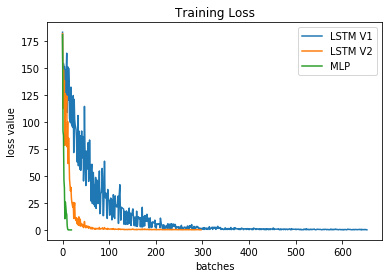

In [100]:
plt.plot(loss_history, label='LSTM V1')
plt.plot(loss_history2, label='LSTM V2')
plt.plot(loss_history3, label='MLP')

plt.legend(loc='upper right')
plt.ylabel('loss value')
plt.xlabel('batches')
plt.title("Training Loss")
# plt.ylim(0, 10)

plt.show()

## Test Model

#### Test Model

In [0]:
def testModel(inputSet, targetSet, gates, nramController, readMemory, writeMemory, epochs=2, max_timesteps=5, debug=False):
  loss_history = []

  for (input_data, target_data) in zip(inputSet, targetSet):
        cost = 0
        cum_prob_complete = 0
        prob_incomplete = 1

        registers = tf.concat([registerValueModule(0), registerValueModule(0), registerValueModule(0)], axis=0)
        registers = tf.reshape(registers, shape=[1, registers.shape[0], registers.shape[1]])
        memory = input_data

        for timestep in range(max_timesteps):
          register_data = []
          registersNumpy = registers.numpy()
          for i in range(registersNumpy.shape[1]):
            register_data.append(registersNumpy[0][i][0])
          register_data = np.array([register_data], dtype="float32")

          gateControllerOutput, registerControllerOutput, status = nramController(register_data)
          output_registers, memory = runTimeStepNN(gates, registers, memory, readMemory, writeMemory, gateControllerOutput, registerControllerOutput)

          if debug:
            print("\n\noutputs")
            print("Timestep: ",timestep)

            for values in gateControllerOutput:
              print("\n Gate Controller vals:")
              for v in values:
                print(v.numpy())
            
            for i in range(len(registerControllerOutput)):
              print("\nRegister controller ", i)
              print(registerControllerOutput[i].numpy())

            print("\nOutput registers")
            print(output_registers.numpy())
            
            print("\nOutput memory")
            print(memory.numpy())

          registers = output_registers
          if timestep == max_timesteps:
              prob_complete = 1 - cum_prob_complete
          else:
              prob_complete = status * prob_incomplete

          # Update the probability that the computation isn't complete
          prob_incomplete *= 1 - status

          # Accumulate the probability that a result has been produced.
          cum_prob_complete += prob_complete

          # Cost for this timestep.
          unscaled_cost = 0

          # Add epsilon to every log to avoid having inf in costs.
          epsilon = tf.constant(1e-35, shape=[output_registers.shape[0], output_registers.shape[2]])

          for r in range(memory.shape[0]):
              y = target_data[r]
              yPredicted = memory[r]
              loss = tf.math.reduce_sum((y * tf.math.log(tf.math.add(yPredicted, epsilon))), axis=1)
              unscaled_cost += tf.reshape(loss, [loss.shape[0], 1])

          scaled_cost = prob_complete * unscaled_cost
          cost -= scaled_cost
        final_cost = tf.math.reduce_sum(cost)

        # store the loss history 
        loss_history.append(final_cost.numpy())
        if debug:
          print("final cost:", final_cost.numpy())
  return loss_history, memory

In [0]:
## Test
test_loss_history3, outputMemory = testModel(inputTestSet, targetTestSet, gates, model3, readMemory, writeMemory)

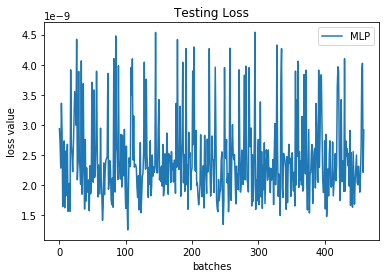

In [103]:
# plt.plot(loss_history, label='LSTM V1')
# plt.plot(loss_history2, label='LSTM V2')
plt.plot(test_loss_history3, label='MLP')

plt.legend(loc='upper right')
plt.ylabel('loss value')
plt.xlabel('batches')
plt.title("Testing Loss")
# plt.ylim(0, 10)

plt.show()

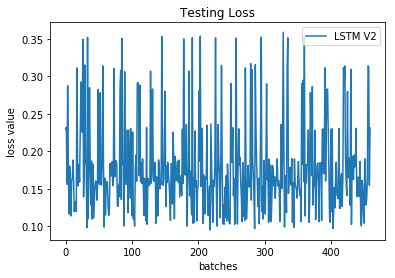

In [105]:
## Test
test_loss_history2, outputMemory = testModel(inputTestSet, targetTestSet, gates, model2, readMemory, writeMemory)
# plt.plot(loss_history, label='LSTM V1')
plt.plot(test_loss_history2, label='LSTM V2')

plt.legend(loc='upper right')
plt.ylabel('loss value')
plt.xlabel('batches')
plt.title("Testing Loss")
# plt.ylim(0, 10)

plt.show()

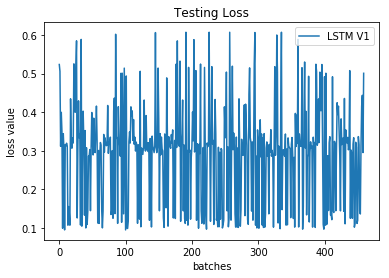

In [106]:
## Test
test_loss_history1, outputMemory = testModel(inputTestSet, targetTestSet, gates, model, readMemory, writeMemory)
plt.plot(test_loss_history1, label='LSTM V1')

plt.legend(loc='upper right')
plt.ylabel('loss value')
plt.xlabel('batches')
plt.title("Testing Loss")
# plt.ylim(0, 10)

plt.show()

### Test model larger array size

In [104]:
## Generate dataset
inputSet2, targetSet2 = dataset6(500, M)


index:
[0 2 1]
2
15
9

index:
[0 1 2]
6
10
18
[11 14 17  0  2 15  9  6 10 18  0  0  0  0  0  0  0  0  0  0]
[11 14 17  0  2 15  9  6 10 18  0  2  6  0  9 10  0 15 18  0]

index:
[0 1 2]
2
10
16

index:
[0 1 2]
1
12
19
[11 14 17  0  2 10 16  1 12 19  0  0  0  0  0  0  0  0  0  0]
[11 14 17  0  2 10 16  1 12 19  0  2  1  0 10 12  0 16 19  0]

index:
[0 2 1]
4
14
12

index:
[2 0 1]
16
1
11
[11 14 17  0  4 14 12 16  1 11  0  0  0  0  0  0  0  0  0  0]
[11 14 17  0  4 14 12 16  1 11  0  4  1  0 12 11  0 14 16  0]

index:
[0 2 1]
6
19
12

index:
[1 0 2]
12
1
14
[11 14 17  0  6 19 12 12  1 14  0  0  0  0  0  0  0  0  0  0]
[11 14 17  0  6 19 12 12  1 14  0  6  1  0 12 12  0 19 14  0]

index:
[0 1 2]
5
9
19

index:
[2 1 0]
17
9
1
[11 14 17  0  5  9 19 17  9  1  0  0  0  0  0  0  0  0  0  0]
[11 14 17  0  5  9 19 17  9  1  0  5  1  0  9  9  0 19 17  0]

index:
[0 2 1]
1
18
13

index:
[0 2 1]
1
18
11
[11 14 17  0  1 18 13  1 18 11  0  0  0  0  0  0  0  0  0  0]
[11 14 17  0  1 18 13  1 18 11  0

No handles with labels found to put in legend.


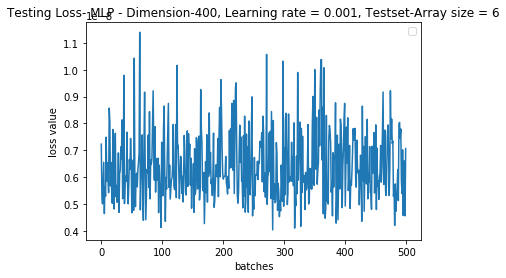

In [107]:
## Test
test_loss_history3, outputMemory = testModel(inputSet2, targetSet2, gates, model3, readMemory, writeMemory)
# plt.plot(loss_history, label='LSTM V1')
# plt.plot(loss_history2, label='LSTM V2')
plt.plot(test_loss_history3, label='')

plt.legend(loc='upper right')
plt.ylabel('loss value')
plt.xlabel('batches')
plt.title("Testing Loss- MLP - Dimension-400, Learning rate = 0.001, Testset-Array size = 6")
# plt.ylim(0, 10)

plt.show()

No handles with labels found to put in legend.


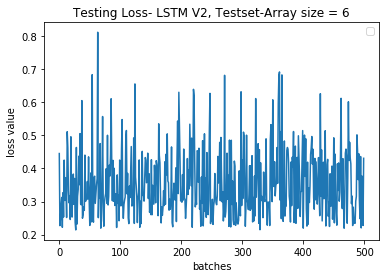

In [108]:
## Test
test_loss_history2, outputMemory = testModel(inputSet2, targetSet2, gates, model2, readMemory, writeMemory)
plt.plot(test_loss_history2, label='')

plt.legend(loc='upper right')
plt.ylabel('loss value')
plt.xlabel('batches')
plt.title("Testing Loss- LSTM V2, Testset-Array size = 6")
# plt.ylim(0, 10)

plt.show()

No handles with labels found to put in legend.


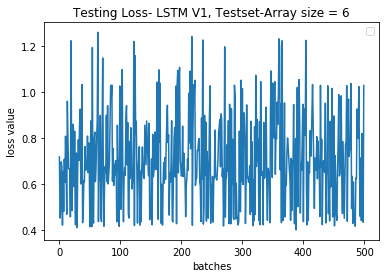

In [109]:
## Test
test_loss_history1, outputMemory = testModel(inputSet2, targetSet2, gates, model, readMemory, writeMemory)
plt.plot(test_loss_history1, label='')

plt.legend(loc='upper right')
plt.ylabel('loss value')
plt.xlabel('batches')
plt.title("Testing Loss- LSTM V1, Testset-Array size = 6")
# plt.ylim(0, 10)

plt.show()

#### Debug

In [0]:
np.argmax(inputTestSet[0], axis=1)

array([ 9, 12, 15,  0,  2, 11, 16, 13,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0])

In [0]:
np.argmax(targetTestSet[0], axis=1)

array([ 9, 12, 15,  0,  2, 11, 16, 13,  0,  2,  0,  0, 11, 13,  0, 16,  0,
        0,  0,  0])

In [0]:
## Test
test_loss_history3, outputMemory = testModel([inputTestSet[0]], [targetTestSet[0]], gates, model3, readMemory, writeMemory, debug=True)



outputs
Timestep:  0

 Gate Controller vals:
[[1.0000000e+00 2.0749768e-30 1.1916680e-15]]

 Gate Controller vals:
[[0.0453767  0.04226048 0.02849487 0.883868  ]]

 Gate Controller vals:
[[1.9230084e-02 2.0583003e-04 5.4097444e-02 3.5864084e-03 9.2288029e-01]]

 Gate Controller vals:
[[0.512354   0.00083659 0.00189412 0.07207454 0.40687093 0.00596978]]

 Gate Controller vals:
[[1.2186808e-23 1.2133012e-21 4.1034584e-24 1.0000000e+00 7.3779851e-23
  2.1282702e-16 5.5865900e-08]]

 Gate Controller vals:
[[3.5184866e-03 4.8063193e-02 2.3894047e-02 6.6559601e-01 2.5245256e-03
  1.3693526e-01 1.1938834e-01 8.0025529e-05]]
[[4.5159176e-01 3.1089552e-05 5.2530062e-03 3.2291140e-02 3.7055090e-03
  2.8689563e-01 6.2116768e-02 1.5811506e-01]]

 Gate Controller vals:
[[5.6772782e-03 8.1340671e-02 1.4191890e-02 4.7099214e-02 3.7019590e-01
  4.6109533e-01 2.5586702e-04 1.4742390e-02 5.4015005e-03]]
[[4.9728586e-04 1.6325013e-01 6.7094785e-01 2.8066393e-03 7.2426163e-04
  3.7025618e-03 1.6551193e-

In [0]:
np.argmax(outputMemory, axis=1)

array([ 9, 12, 15, 11,  2, 11, 16, 13, 11,  8,  8, 11, 11, 11, 11, 11, 11,
       11, 11, 11])

In [0]:
## Test
test_loss_history1, outputMemory = testModel(inputTestSet, targetTestSet, gates, model, readMemory, writeMemory)
plt.plot(test_loss_history1, label='LSTM V1')

plt.legend(loc='upper right')
plt.ylabel('loss value')
plt.xlabel('batches')
plt.title("Testing Loss")
# plt.ylim(0, 10)

plt.show()

## Bucket Sort

https://www.geeksforgeeks.org/bucket-sort-2/

In [0]:
# Python3 program to sort an array 
# using bucket sort 
def insertionSort(b): 
	for i in range(1, len(b)): 
		up = b[i] 
		j = i - 1
		while j >=0 and b[j] > up: 
			b[j + 1] = b[j] 
			j -= 1
		b[j + 1] = up	 
	return b	 
			
def bucketSort(x, M): 
	arr = [] 
	slot_num = 3 # 10 means 10 slots, each 
				# slot's size is 0.1 
	for i in range(slot_num): 
		arr.append([]) 
		
	# Put array elements in different buckets 
	for j in x: 
		index_b = int((slot_num * j)/M) 
		arr[index_b].append(j) 
	
	# Sort individual buckets 
	for i in range(slot_num): 
		arr[i] = insertionSort(arr[i]) 
	
	# concatenate the result 
	k = 0
	for i in range(slot_num): 
		for j in range(len(arr[i])): 
			x[k] = arr[i][j] 
			k += 1
	return x, arr

# Driver Code 
x = [1, 4, 3, 6, 
	2, 5, 7, 9, 8] 
print("Sorted Array is") 
print(bucketSort(x, 10))


# Driver Code 
x = [1, 14, 13, 6, 
	12, 15, 7, 19, 8] 
print("Sorted Array is") 
print(bucketSort(x, 20))

Sorted Array is
([1, 2, 3, 4, 5, 6, 7, 8, 9], [[1, 2, 3], [4, 5, 6], [7, 8, 9]])
Sorted Array is
([1, 6, 7, 8, 12, 13, 14, 15, 19], [[1, 6], [7, 8, 12, 13], [14, 15, 19]])
